# Advanced preprocessing

## Morphological operations

Let's dive a bit deeper. 
In order to have clearer images, ready for further processing, we have to clean them. Indeed, there is some "recurrent noise" in some images, the kind of noise that you often have to deal with.
It can be noise coming from bad quality scanners or the ones that you find on old paper, and many more...

To fix that, openCV has a bunch of methods that are very handy. 

Take the time [to read this](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html), you will need it!

## Image thresholding

Another hot topic in image preprocessing is image thresholding, which is basically deciding if a pixel should be white or black to remove the noise.
[Here is the official documentation](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html) about it.
And [a well made article about it](https://medium.com/spinor/a-straightforward-introduction-to-image-thresholding-using-python-f1c085f02d5e).
Take the time to read both, they are super useful.

## Practice time
Now that you start to see how powerful openCV is, let's take a concrete example.
You want to detect the most recurrent words in a book. You scan the entire book and you end with pictures like that:

<img src="./assets/book_original.jpg" height="800" />

Play with openCV and try to get something like that:

<img src="./assets/book_clean.jpg" height="800" />

It doesn't have to be perfect, the goal here is **to learn how to use opencv**. You **don't need to care about the result**!

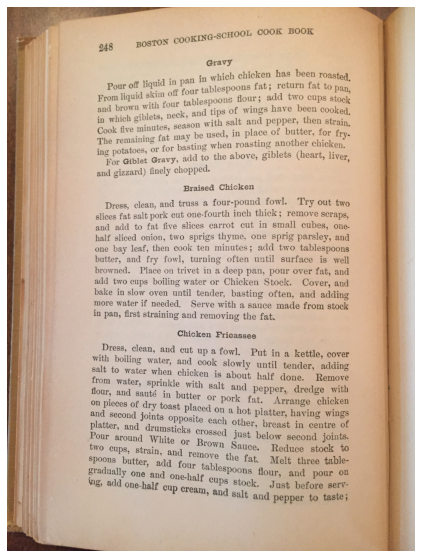

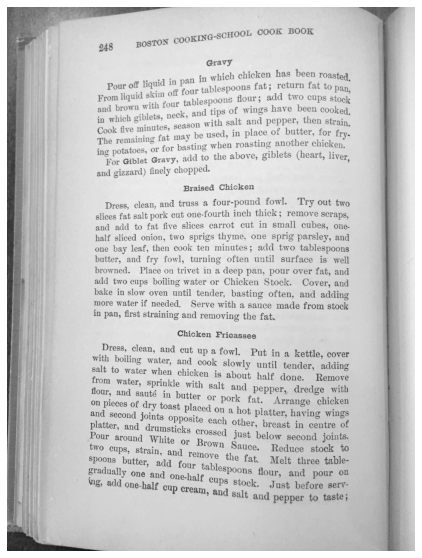

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Change display image size in notebook with matplotlib
# ( https://www.mikulskibartosz.name/how-to-change-plot-size-in-jupyter-notebook/ ) 
plt.rcParams["figure.figsize"] = (20,10)

# Open the colored image with openCV 
# WARNING: openCV works with the BGR(blue, green, red) color map, whereas pyplot works with RGB
img_BGR = cv2.imread('assets/book_original.jpg', cv2.IMREAD_COLOR)
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

#We can additionally convert it to grayscale
img_GRAYSCALE =  cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)


# Display the image with openCV in notebook
# In color
plt.figure()
plt.axis('off')
plt.imshow(img_RGB)

# In gray
plt.figure()
plt.axis('off')
plt.imshow(img_GRAYSCALE, cmap='gray') # cmap='gray' is necessary to render it as a grayscale image

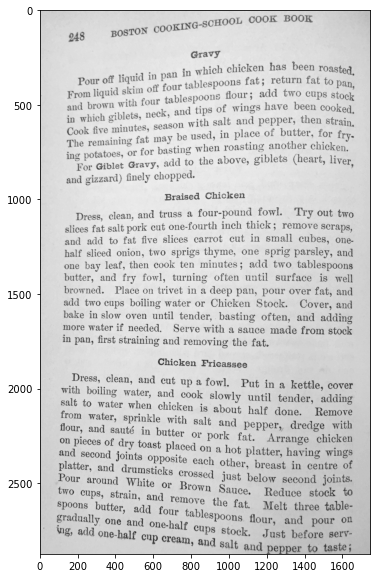

(Text(0.5, 1.0, "Otsu's Thresholding"), ([], []), ([], []))

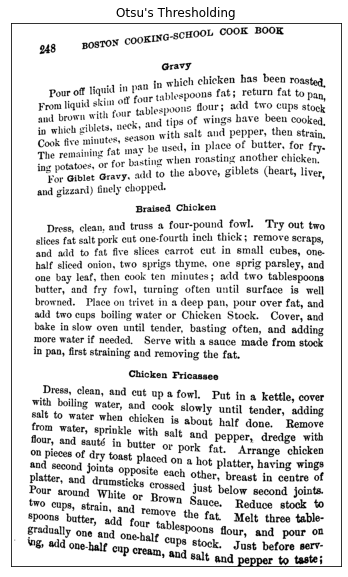

In [28]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = img_GRAYSCALE
w, h = img.shape
top=100
right=400
down=390
left=700
img = img[top:((w-down)+top), right:((h-left)+right)]
plt.imshow(img, cmap="gray")
plt.show()
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]


plt.imshow(th3,'gray')
plt.title(titles[2*3+2]), plt.xticks([]), plt.yticks([])







